In [46]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vfinal/Final.parquet
/kaggle/input/semanalfinal/identificados_semanal.parquet
/kaggle/input/mensualfinal/identificados.parquet
/kaggle/input/serie-diaria/municipios_diaria_SinConc.parquet


In [47]:
df = pd.read_parquet("/kaggle/input/vfinal/Final.parquet")
df

,Nombre_Municipio_IPS,Nombre_Departamento_IPS,Nombre_Municipio_Establecimiento,Nombre_Departamento_Establecimiento,FECHA_ATENCION,Concepto_Factura_Desc,Cantidad,Geogra_Municipio_Id,MUNICIPIO
0,MEDELLIN,ANTIOQUIA,?,?,2019-07-12 06:20:00,MSI -MEDICO SEGUIMIENTO INTEGRAL,1.0,586,BOGOTA
1,MEDELLIN,ANTIOQUIA,?,?,2019-06-18 11:08:00,SESIONES DE FISIOTERAPIA,2.0,586,BOGOTA
2,BOGOTA,BOGOTA D.C.,?,?,2019-03-05 07:20:00,CONSULTA ORTOPEDISTA,1.0,586,BOGOTA
3,POPAYAN,CAUCA,?,?,2019-10-05 10:03:00,CONSULTA NO PROGRAMADA,1.0,834,SANTIAGO DE CALI
4,SANTIAGO DE CALI,VALLE DEL CAUCA,?,?,2019-06-25 07:13:00,RADIOGRAFIA,1.0,2546,GUACARI
...,...,...,...,...,...,...,...,...,...
11716411,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,2024-10-01 12:00:00,CONSULTA ORTOPEDISTA,1.0,586,BOGOTA
11716412,MEDELLIN,ANTIOQUIA,?,?,2024-12-17 20:10:30,CALIFICACIÓN DE ORIGEN AT,1.0,586,BOGOTA
11716413,MEDELLIN,ANTIOQUIA,?,?,2024-10-02 00:00:00,SESIONES DE FISIOTERAPIA,2.0,586,BOGOTA
11716414,BOGOTA,HUILA,?,?,2024-11-07 00:00:00,CONSULTA PSIQUIATRIA TELEMEDICINA (L),1.0,4584,NEIVA


In [48]:
df.columns

Index(['Nombre_Municipio_IPS', 'Nombre_Departamento_IPS',
       'Nombre_Municipio_Establecimiento',
       'Nombre_Departamento_Establecimiento', 'FECHA_ATENCION',
       'Concepto_Factura_Desc', 'Cantidad', 'Geogra_Municipio_Id',
       'MUNICIPIO'],
      dtype='object')

Comenzamos con el Proceso de limpieza de los datos.

In [49]:
#Para ver variables categoricas y numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11716416 entries, 0 to 11716415
Data columns (total 9 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   Nombre_Municipio_IPS                 object        
 1   Nombre_Departamento_IPS              object        
 2   Nombre_Municipio_Establecimiento     object        
 3   Nombre_Departamento_Establecimiento  object        
 4   FECHA_ATENCION                       datetime64[ns]
 5   Concepto_Factura_Desc                object        
 6   Cantidad                             float64       
 7   Geogra_Municipio_Id                  int64         
 8   MUNICIPIO                            object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 804.5+ MB


1. Verificamos los valores Nulos

In [52]:
df.isnull().sum()

Nombre_Municipio_IPS                   3
Nombre_Departamento_IPS                3
Nombre_Municipio_Establecimiento       3
Nombre_Departamento_Establecimiento    3
FECHA_ATENCION                         6
Concepto_Factura_Desc                  3
Cantidad                               0
Geogra_Municipio_Id                    0
MUNICIPIO                              0
dtype: int64

Esta verificacion de datos nulos puede ser un poco engañosa, pues en el dataset hay datos faltantes disfrazados a los que tambien se les eaplicara un tratamiento especial.

2. Revisar valores únicos y consistencia en texto
Esto es útil para detectar errores de escritura o inconsistencias en nombres de municipios o departamentos:

In [53]:
print(df['Nombre_Municipio_IPS'].value_counts(dropna=False))
print(df['Nombre_Departamento_IPS'].value_counts(dropna=False))
print(df['Concepto_Factura_Desc'].value_counts(dropna=False))

Nombre_Municipio_IPS
MEDELLIN            6704015
BOGOTA              1337323
SANTIAGO DE CALI     552647
BARRANQUILLA         446907
BUCARAMANGA          267558
                     ...   
PAIME                     1
COVARACHIA                1
SAN JOSÉ DE URÉ           1
UMBITA                    1
ATRATO                    1
Name: count, Length: 1085, dtype: int64
Nombre_Departamento_IPS
ANTIOQUIA                   6680292
BOGOTA D.C.                 1164060
VALLE DEL CAUCA              826816
ATLANTICO                    409661
?                            380376
SANTANDER                    317849
RISARALDA                    281474
CUNDINAMARCA                 271573
META                         192169
CALDAS                       187807
NORTE DE SANTANDER           125730
HUILA                        110273
MAGDALENA                    107246
CESAR                         87132
CORDOBA                       87048
QUINDIO                       81569
BOLIVAR                       7

3. Estandarizar nombres de texto (eliminamos los espacios innecesario y ademas pasamos todo a mayusculas)

In [54]:
# Limpiar y estandarizar texto: mayúsculas, sin espacios al inicio/fin, y con guiones bajos en vez de espacios internos
cols_to_clean = [
    'Nombre_Municipio_IPS',
    'Nombre_Departamento_IPS',
    'Concepto_Factura_Desc',
    'MUNICIPIO'
]

# Estandarización de texto: mayúsculas, sin espacios, guiones bajos
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.upper().str.strip().str.replace(' ', '_')

# Reemplazo de valores no válidos o mal cargados por NaN
df[cols_to_clean] = df[cols_to_clean].replace(
    r'^\s*$|^NONE$|^\?$|^SIN_DATOS$|^NOMBRE_.*$', 
    np.nan,
    regex=True
)

In [55]:
# PARA VERIFICAR LOS CAMBIOS
df.head(50)

,Nombre_Municipio_IPS,Nombre_Departamento_IPS,Nombre_Municipio_Establecimiento,Nombre_Departamento_Establecimiento,FECHA_ATENCION,Concepto_Factura_Desc,Cantidad,Geogra_Municipio_Id,MUNICIPIO
0,MEDELLIN,ANTIOQUIA,?,?,2019-07-12 06:20:00,MSI_-MEDICO_SEGUIMIENTO_INTEGRAL,1.0,586,BOGOTA
1,MEDELLIN,ANTIOQUIA,?,?,2019-06-18 11:08:00,SESIONES_DE_FISIOTERAPIA,2.0,586,BOGOTA
2,BOGOTA,BOGOTA_D.C.,?,?,2019-03-05 07:20:00,CONSULTA_ORTOPEDISTA,1.0,586,BOGOTA
3,POPAYAN,CAUCA,?,?,2019-10-05 10:03:00,CONSULTA_NO_PROGRAMADA,1.0,834,SANTIAGO_DE_CALI
4,SANTIAGO_DE_CALI,VALLE_DEL_CAUCA,?,?,2019-06-25 07:13:00,RADIOGRAFIA,1.0,2546,GUACARI
5,MANIZALES,CALDAS,?,?,2019-02-20 07:57:00,URGENCIAS_MEDICO_GENERAL,1.0,4192,MANIZALES
6,PEREIRA,RISARALDA,PEREIRA,RISARALDA,2019-08-26 06:09:00,MEDICAMENTOS_AMBULATORIOS,1.0,657,BUCARAMANGA
7,MEDELLIN,ANTIOQUIA,?,?,2019-06-25 15:40:00,SESIONES_DE_FISIOTERAPIA,2.0,586,BOGOTA
8,VILLAVICENCIO,META,?,?,2019-03-07 15:00:00,RNM_-_RESONANCIA_NUCLEAR_MAGNETICA,1.0,7366,ACACIAS
9,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,2019-08-13 00:00:00,MEDICAMENTOS_AMBULATORIOS,1.0,4292,MEDELLIN


In [ ]:
df.isnull().sum()

Las variables FECHA_ATENCION y Concepto_Factura_Desc contienen muy pocos valores nulos, estos valores los podemos eliminar, pues eliminar estos registros no afectará significativamente el análisis.

In [56]:
# Filtrar y copiar para evitar
df = df.dropna(subset=['FECHA_ATENCION', 'Concepto_Factura_Desc']).copy()

In [57]:
df.isnull().sum()

Nombre_Municipio_IPS                        0
Nombre_Departamento_IPS                380376
Nombre_Municipio_Establecimiento            0
Nombre_Departamento_Establecimiento         0
FECHA_ATENCION                              0
Concepto_Factura_Desc                       0
Cantidad                                    0
Geogra_Municipio_Id                         0
MUNICIPIO                                   0
dtype: int64

Agruparemos por MUNICIPIO, CONCEPTO_FACTURA y MES, sumando la cantidad total por cada combinación.

# Analisis Exploratorio

Veamos como se comporta un Concepto dado en un municipio dado a lo largo de nuestra serie de tiempo.

# Series Mensuales, Semanales, Diarias.

## Imports

In [63]:
# Instalar solo lo que falta (neuralforecast), cuando se entrene modelo, recuerda encender el internet.
!pip install neuralforecast 
#!pip install statsmodels #por si no esta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 6.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00


In [64]:
# Mejoras en configuración inicial
import os
import warnings
import torch
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NBEATSx  # Añadido NBEATSx (versión mejorada)
from neuralforecast.losses.pytorch import MAE, MASE, SMAPE  # Añadidas más funciones de pérdida
from sklearn.preprocessing import LabelEncoder, RobustScaler  # Añadido RobustScaler para mayor robustez
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL
import gc
import joblib
from tqdm import tqdm  # Para barras de progreso

In [65]:
# Suprimir advertencias no críticas
warnings.filterwarnings('ignore')

# Configuración avanzada de rendimiento
torch.set_float32_matmul_precision('high')
torch.backends.cudnn.benchmark = True  # Acelera operaciones convolutivas
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Configuración de memoria para GPU si está disponible
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(f'GPU disponible: {torch.cuda.get_device_name(1)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(1).total_memory / 1e9:.2f} GB')

Usando dispositivo: cuda
GPU disponible: Tesla T4
Memoria GPU: 15.83 GB


## Serie Semanal

In [ ]:
# import gc
# import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings('ignore', category=UserWarning, module='pandas') # Ignorar advertencias sobre Period

# def load_and_preprocess_detailed_weekly(file_path, covid_start_date='2020-03-01', covid_end_date='2022-06-30',
#                                        filter_min_weeks_active=5, filter_min_total_qty=10):
#     """
#     Carga y preprocesa datos de demanda desde archivo Parquet, agregando
#     SEMANALMENTE por Municipio y Concepto de Factura.
#     Crea un ID único por serie, incluye flag COVID y aplica filtros opcionales.

#     Args:
#         file_path: Ruta al archivo Parquet.
#         covid_start_date: Fecha de inicio (inclusive) para marcar como periodo COVID.
#         covid_end_date: Fecha de fin (inclusive) para marcar como periodo COVID.
#         filter_min_weeks_active: int o None. Si es int, filtra series con menos semanas de actividad (>0).
#         filter_min_total_qty: int o None. Si es int, filtra series con cantidad total menor a este valor.
#     """
#     # Leer columnas necesarias desde Parquet
#     print("Cargando datos...")
#     required_columns = ['FECHA_ATENCION', 'MUNICIPIO', 'Concepto_Factura_Desc', 'Cantidad']
#     try:
#         df = pd.read_parquet(file_path, columns=required_columns)
#     except Exception as e:
#         raise FileNotFoundError(f"Error al leer el archivo Parquet '{file_path}': {e}")

#     # --- Verificación inicial ---
#     if df.empty:
#         raise ValueError("El archivo Parquet está vacío o no contiene las columnas requeridas.")
#     print(f"Columnas cargadas: {df.columns.tolist()}")
#     print(f"Filas iniciales: {len(df):,}")

#     # Limpiar nombres y manejar nulos iniciales
#     df.columns = df.columns.str.strip()
#     for col in required_columns:
#         if col not in df.columns:
#             raise ValueError(f"La columna requerida '{col}' no se encontró en el archivo.")
#     df.dropna(subset=['FECHA_ATENCION', 'MUNICIPIO', 'Concepto_Factura_Desc'], inplace=True)
#     df['Cantidad'] = df['Cantidad'].fillna(0)

#     print(f"Filas después de eliminar nulos en claves: {len(df):,}")
#     if df.empty:
#         print("Advertencia: No quedan datos después de eliminar nulos en columnas clave.")
#         return pd.DataFrame(), [], [], []

#     # Optimizar tipos de datos
#     print("Optimizando tipos de datos...")
#     df['MUNICIPIO'] = df['MUNICIPIO'].astype('category')
#     df['Concepto_Factura_Desc'] = df['Concepto_Factura_Desc'].astype('category')
#     df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce').fillna(0).astype('float32')
#     df['FECHA_ATENCION'] = pd.to_datetime(df['FECHA_ATENCION'], errors='coerce')
#     df.dropna(subset=['FECHA_ATENCION'], inplace=True) # Eliminar fechas inválidas

#     print(f"Filas después de eliminar fechas inválidas: {len(df):,}")
#     if df.empty:
#         print("Advertencia: No quedan datos después de eliminar fechas inválidas.")
#         return pd.DataFrame(), [], [], []

#     print(f"Dataset optimizado: {df.shape[0]:,} filas, {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

#     # --- Agregación SEMANAL ---
#     print("Agregando datos por SEMANA (inicio Lunes), municipio y concepto...")
#     # Usamos dt.to_period('W') para obtener la semana ISO y .dt.to_timestamp() para obtener
#     # el timestamp del LUNES de esa semana, lo que facilita el rellenado posterior.
#     df['ds'] = df['FECHA_ATENCION'].dt.to_period('W').dt.to_timestamp() # <-- CAMBIO CLAVE: Semana
#     grouping_cols = ['MUNICIPIO', 'Concepto_Factura_Desc', 'ds']

#     df_semanal = (
#         df.groupby(grouping_cols, observed=False)['Cantidad'] # observed=False puede ser más seguro con categories
#         .sum()
#         .reset_index()
#         .rename(columns={'Cantidad': 'y'})
#     )
#     print(f"Filas después de agregar SEMANALMENTE: {len(df_semanal):,}")

#     if df_semanal.empty:
#        print("Advertencia: No hay datos después de la agregación semanal.")
#        return pd.DataFrame(), [], [], []

#     # Crear el Identificador Único de Serie (ID_Serie)
#     print("Creando ID_Serie...")
#     df_semanal['ID_Serie'] = df_semanal['MUNICIPIO'].astype(str) + '_' + df_semanal['Concepto_Factura_Desc'].astype(str)
#     df_semanal['ID_Serie'] = df_semanal['ID_Serie'].astype('category')

#     # --- Filtrado Opcional de Series (ANTES de completar) ---
#     num_series_before_filter = df_semanal['ID_Serie'].nunique()
#     print(f"Número de series únicas ANTES del filtrado: {num_series_before_filter:,}")

#     if filter_min_weeks_active is not None and filter_min_weeks_active > 0:
#         print(f"Filtrando series con menos de {filter_min_weeks_active} semanas activas (y>0)...")
#         weeks_active = df_semanal[df_semanal['y'] > 0].groupby('ID_Serie')['ds'].nunique()
#         series_to_keep_active = weeks_active[weeks_active >= filter_min_weeks_active].index
#         df_semanal = df_semanal[df_semanal['ID_Serie'].isin(series_to_keep_active)]
#         print(f"  Series restantes después del filtro de actividad: {df_semanal['ID_Serie'].nunique():,}")

#     if filter_min_total_qty is not None and filter_min_total_qty > 0:
#          print(f"Filtrando series con cantidad total menor a {filter_min_total_qty}...")
#          total_qty = df_semanal.groupby('ID_Serie')['y'].sum()
#          series_to_keep_qty = total_qty[total_qty >= filter_min_total_qty].index
#          df_semanal = df_semanal[df_semanal['ID_Serie'].isin(series_to_keep_qty)]
#          print(f"  Series restantes después del filtro de cantidad: {df_semanal['ID_Serie'].nunique():,}")

#     num_series_after_filter = df_semanal['ID_Serie'].nunique()
#     if num_series_after_filter == 0:
#         print("Advertencia: El filtrado eliminó todas las series.")
#         return pd.DataFrame(), [], [], []
#     print(f"Número de series únicas DESPUÉS del filtrado: {num_series_after_filter:,}")


#     # --- Completar series temporales SEMANALES para cada ID_Serie filtrada ---
#     print("Completando series temporales SEMANALES por ID_Serie filtrada...")
#     min_week = df_semanal['ds'].min()
#     max_week = df_semanal['ds'].max()
#     # Usar freq='W-MON' para asegurar que coincide con el timestamp generado por .to_period('W').dt.to_timestamp()
#     week_range = pd.date_range(min_week, max_week, freq='W-MON') # Frecuencia Semanal (Lunes)

#     unique_series_ids_filtered = df_semanal['ID_Serie'].unique()

#     # Mapa para restaurar detalles
#     map_id_to_details = df_semanal[['ID_Serie', 'MUNICIPIO', 'Concepto_Factura_Desc']].drop_duplicates().set_index('ID_Serie')

#     # MultiIndex con combinaciones semana-serie filtrada
#     idx = pd.MultiIndex.from_product(
#         [unique_series_ids_filtered, week_range],
#         names=['ID_Serie', 'ds']
#     )

#     # Reindexar y rellenar
#     serie_completa = (
#         df_semanal.set_index(['ID_Serie', 'ds'])['y']
#         .reindex(idx, fill_value=0)
#         .reset_index()
#     )

#     # Añadir detalles de Municipio/Concepto
#     serie_completa = pd.merge(serie_completa, map_id_to_details.reset_index(), on='ID_Serie', how='left')

#     print(f"Filas después de completar series SEMANALES: {len(serie_completa):,}")
#     print(f"Uso de memoria estimado: {serie_completa.memory_usage(deep=True).sum() / 1e6:.2f} MB") # Mucho menor ahora

#     # --- Añadir características temporales SEMANALES ---
#     print("Añadiendo características temporales semanales...")
#     serie_completa['año'] = serie_completa['ds'].dt.year
#     serie_completa['mes'] = serie_completa['ds'].dt.month # El mes puede seguir siendo útil
#     serie_completa['semana_año'] = serie_completa['ds'].dt.isocalendar().week.astype(int) # <-- Característica semanal clave
#     serie_completa['trimestre'] = serie_completa['ds'].dt.quarter
#     # Se eliminan características diarias

#     # Añadir índice de tiempo numérico (número de semanas transcurridas por serie)
#     print("Añadiendo índice de tiempo numérico (time_idx)...")
#     serie_completa = serie_completa.sort_values(by=['ID_Serie', 'ds'])
#     serie_completa['time_idx'] = serie_completa.groupby('ID_Serie').cumcount()

#     # --- Añadir flag para el periodo COVID ---
#     print("Añadiendo flag COVID...")
#     start_dt = pd.to_datetime(covid_start_date)
#     end_dt = pd.to_datetime(covid_end_date)
#     # La comparación funciona igual con las fechas de inicio de semana
#     serie_completa['es_covid'] = (
#         (serie_completa['ds'] >= start_dt) & (serie_completa['ds'] <= end_dt)
#     ).astype(int)

#     # Liberar memoria
#     del df, df_semanal
#     gc.collect()

#     # Obtener listas únicas finales (basadas en el df filtrado y completado)
#     municipios_final = serie_completa['MUNICIPIO'].unique().tolist()
#     conceptos_final = serie_completa['Concepto_Factura_Desc'].unique().tolist()
#     series_ids_final = serie_completa['ID_Serie'].unique().tolist() # Ya son las filtradas

#     print(f"Procesamiento SEMANAL completo para {len(series_ids_final)} series únicas (Municipio-Concepto)")
#     print(f"Total de registros en la serie final: {serie_completa.shape[0]:,}") # <-- ESTE NÚMERO DEBERÍA SER MUCHO MENOR
#     print(f"Periodo cubierto (inicio de semana): {min_week.strftime('%Y-%m-%d')} a {max_week.strftime('%Y-%m-%d')}")
#     print(f"Columnas finales: {serie_completa.columns.tolist()}")

#     return serie_completa, municipios_final, conceptos_final, series_ids_final

# def visualize_specific_series_weekly(serie_completa, id_serie_to_visualize):
#     """
#     Visualiza la demanda SEMANAL de una serie específica (Municipio-Concepto).
#     """
#     plt.figure(figsize=(16, 7)) # Ancho adecuado para series semanales

#     datos_serie = serie_completa[serie_completa['ID_Serie'] == id_serie_to_visualize].sort_values('ds')

#     if datos_serie.empty:
#         print(f"No se encontraron datos para ID_Serie: {id_serie_to_visualize}")
#         return

#     plt.plot(datos_serie['ds'], datos_serie['y'], marker='.', linestyle='-', label='Demanda Semanal (y)', markersize=5)

#     # Resaltar periodo COVID
#     if 'es_covid' in datos_serie.columns:
#         covid_period = datos_serie[datos_serie['es_covid'] == 1]
#         if not covid_period.empty:
#             plt.fill_between(datos_serie['ds'], 0, datos_serie['y'].max() * 1.05,
#                              where=datos_serie['es_covid'] == 1,
#                              color='red', alpha=0.15, label='Periodo COVID estimado')

#     plt.title(f'Demanda SEMANAL - Serie: {id_serie_to_visualize}')
#     plt.xlabel('Semana (Inicio Lunes)')
#     plt.ylabel('Cantidad (y)')
#     plt.grid(True, linestyle='--', alpha=0.6)
#     plt.xticks(rotation=30, ha='right')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # --- Uso ---
# file_path = '/kaggle/input/vfinal/Final.parquet' 

# # --- AJUSTA LOS PARÁMETROS DE FILTRADO AQUÍ ---
# # Puedes empezar sin filtros (None) o con valores bajos y ver cuántas series quedan
# min_semanas_activas = 10 # Ejemplo: requerir al menos 10 semanas con alguna atención
# min_cantidad_total = 20  # Ejemplo: requerir al menos 20 atenciones totales en toda la historia

# try:
#     # Llamar a la función semanal con los filtros
#     serie_final_semanal, municipios, conceptos, series_ids = load_and_preprocess_detailed_weekly(
#         file_path,
#         filter_min_weeks_active=min_semanas_activas,
#         filter_min_total_qty=min_cantidad_total
#     )

#     if not serie_final_semanal.empty:
#         print("\n--- Resumen del DataFrame Procesado SEMANAL ---")
#         print(serie_final_semanal.head())
#         print("\nInformación del DataFrame:")
#         serie_final_semanal.info(verbose=False, memory_usage='deep')
#         print(f"\nNúmero de Municipios únicos: {len(municipios)}")
#         print(f"Número de Conceptos únicos: {len(conceptos)}")
#         print(f"\nNúmero de Series únicas (ID_Serie) DESPUÉS de filtrar: {len(series_ids)}") # <-- Número clave
#         print(f"Número TOTAL de filas final: {len(serie_final_semanal):,}") # <-- Número clave
#         print(f"Rango de fechas (inicio semana): {serie_final_semanal['ds'].min()} a {serie_final_semanal['ds'].max()}")


#         if series_ids:
#             id_ejemplo = series_ids[np.random.randint(0, len(series_ids))] # Elegir una serie al azar de las filtradas
#             print(f"\nVisualizando ejemplo SEMANAL para la serie: {id_ejemplo}")
#             visualize_specific_series_weekly(serie_final_semanal, id_ejemplo)

# except FileNotFoundError as fnf:
#     print(f"Error: {fnf}")
# except ValueError as ve:
#     print(f"Error de datos: {ve}")
# except Exception as e:
#     print(f"Ocurrió un error inesperado durante el procesamiento semanal: {e}")
#     import traceback
#     traceback.print_exc()

In [66]:
def visualize_specific_series_weekly(serie_completa, id_serie_to_visualize):
    """
    Visualiza la demanda SEMANAL de una serie específica (Municipio-Concepto).
    """
    plt.figure(figsize=(16, 7)) # Ancho adecuado para series semanales

    datos_serie = serie_completa[serie_completa['ID_Serie'] == id_serie_to_visualize].sort_values('ds')

    if datos_serie.empty:
        print(f"No se encontraron datos para ID_Serie: {id_serie_to_visualize}")
        return

    plt.plot(datos_serie['ds'], datos_serie['y'], marker='.', linestyle='-', label='Demanda Semanal (y)', markersize=5)

    # Resaltar periodo COVID
    if 'es_covid' in datos_serie.columns:
        covid_period = datos_serie[datos_serie['es_covid'] == 1]
        if not covid_period.empty:
            plt.fill_between(datos_serie['ds'], 0, datos_serie['y'].max() * 1.05,
                             where=datos_serie['es_covid'] == 1,
                             color='red', alpha=0.15, label='Periodo COVID estimado')

    plt.title(f'Demanda SEMANAL - Serie: {id_serie_to_visualize}')
    plt.xlabel('Semana (Inicio Lunes)')
    plt.ylabel('Cantidad (y)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=30, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [67]:
serie_semanal = pd.read_parquet("/kaggle/input/semanalfinal/identificados_semanal.parquet")

In [68]:
serie_semanal

,ID_Serie,ds,y,MUNICIPIO,Concepto_Factura_Desc,año,mes,semana_año,trimestre,time_idx,es_covid
0,ABEJORRAL_CALIFICACIO PERDIDA DE CAPACIDAD LAB...,2018-12-31,0.0,ABEJORRAL,CALIFICACIO PERDIDA DE CAPACIDAD LABORAL,2018,12,1,4,0,0
1,ABEJORRAL_CALIFICACIO PERDIDA DE CAPACIDAD LAB...,2019-01-07,0.0,ABEJORRAL,CALIFICACIO PERDIDA DE CAPACIDAD LABORAL,2019,1,2,1,1,0
2,ABEJORRAL_CALIFICACIO PERDIDA DE CAPACIDAD LAB...,2019-01-14,0.0,ABEJORRAL,CALIFICACIO PERDIDA DE CAPACIDAD LABORAL,2019,1,3,1,2,0
3,ABEJORRAL_CALIFICACIO PERDIDA DE CAPACIDAD LAB...,2019-01-21,0.0,ABEJORRAL,CALIFICACIO PERDIDA DE CAPACIDAD LABORAL,2019,1,4,1,3,0
4,ABEJORRAL_CALIFICACIO PERDIDA DE CAPACIDAD LAB...,2019-01-28,0.0,ABEJORRAL,CALIFICACIO PERDIDA DE CAPACIDAD LABORAL,2019,1,5,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
6863721,ZIPAQUIRA_VACUNACION HEPATITIS B (L),2024-12-02,0.0,ZIPAQUIRA,VACUNACION HEPATITIS B (L),2024,12,49,4,309,0
6863722,ZIPAQUIRA_VACUNACION HEPATITIS B (L),2024-12-09,0.0,ZIPAQUIRA,VACUNACION HEPATITIS B (L),2024,12,50,4,310,0
6863723,ZIPAQUIRA_VACUNACION HEPATITIS B (L),2024-12-16,0.0,ZIPAQUIRA,VACUNACION HEPATITIS B (L),2024,12,51,4,311,0
6863724,ZIPAQUIRA_VACUNACION HEPATITIS B (L),2024-12-23,0.0,ZIPAQUIRA,VACUNACION HEPATITIS B (L),2024,12,52,4,312,0


In [69]:
series_ids = serie_semanal['ID_Serie'].unique().tolist()

### Visualizar semanal


Visualizando ejemplo SEMANAL para la serie: BOGOTA_SESIONES DE FISIOTERAPIA


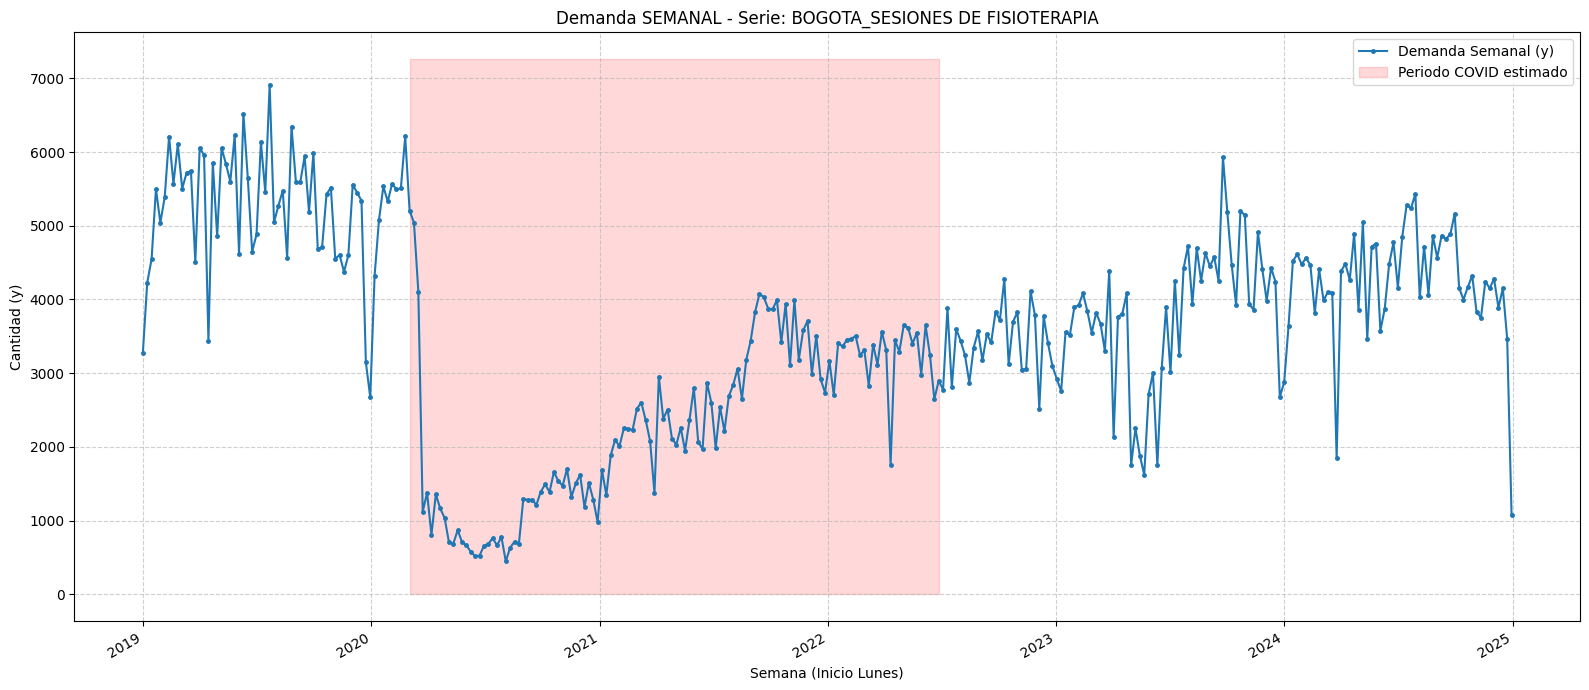

In [71]:
id_ejemplo = series_ids[2406] # Elegir una serie
print(f"\nVisualizando ejemplo SEMANAL para la serie: {id_ejemplo}")
visualize_specific_series_weekly(serie_semanal, id_ejemplo)

## Modelo N-Beats

Usando dispositivo: cuda

Procesando ID_Serie: BOGOTA_SESIONES DE FISIOTERAPIA (Índice: 2406)

Entrenando modelo N-BEATS para BOGOTA_SESIONES DE FISIOTERAPIA...
Params: lr=0.0003, epochs=100, patience=15, batch=32
Arch: hidden=1024, blocks=18, layers=8, stacks=4
Window: input=104, forecast_block=12, test=26
Datos entrenamiento: 288, Prueba: 26
Secuencias de entrenamiento: 173


Epoch 1/100: 100%|██████████| 6/6 [00:01<00:00,  3.25batch/s, loss=0.53] 


Época 1/100, Pérdida: 0.515841


Epoch 2/100: 100%|██████████| 6/6 [00:01<00:00,  3.53batch/s, loss=0.313]


Época 2/100, Pérdida: 0.313878


Epoch 3/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.259]


Época 3/100, Pérdida: 0.223816


Epoch 4/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.176]


Época 4/100, Pérdida: 0.176401


Epoch 5/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.149]


Época 5/100, Pérdida: 0.159628


Epoch 6/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=0.113]


Época 6/100, Pérdida: 0.152476


Epoch 7/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.173]


Época 7/100, Pérdida: 0.146058


Epoch 8/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.132]


Época 8/100, Pérdida: 0.139494


Epoch 9/100: 100%|██████████| 6/6 [00:01<00:00,  3.40batch/s, loss=0.135]


Época 9/100, Pérdida: 0.133455


Epoch 10/100: 100%|██████████| 6/6 [00:01<00:00,  3.34batch/s, loss=0.115]


Época 10/100, Pérdida: 0.119005


Epoch 11/100: 100%|██████████| 6/6 [00:01<00:00,  3.35batch/s, loss=0.0968]


Época 11/100, Pérdida: 0.111227


Epoch 12/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.128] 


Época 12/100, Pérdida: 0.110186


Epoch 13/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.114] 


Época 13/100, Pérdida: 0.103160


Epoch 14/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=0.101] 


Época 14/100, Pérdida: 0.096582


Epoch 15/100: 100%|██████████| 6/6 [00:01<00:00,  3.33batch/s, loss=0.0962]


Época 15/100, Pérdida: 0.086364


Epoch 16/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.0735]


Época 16/100, Pérdida: 0.075972


Epoch 17/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=0.0818]


Época 17/100, Pérdida: 0.074990


Epoch 18/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.0787]


Época 18/100, Pérdida: 0.068383


Epoch 19/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.0411]


Época 19/100, Pérdida: 0.059026


Epoch 20/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=0.0559]


Época 20/100, Pérdida: 0.049950


Epoch 21/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.045] 


Época 21/100, Pérdida: 0.043329


Epoch 22/100: 100%|██████████| 6/6 [00:01<00:00,  3.36batch/s, loss=0.0537]


Época 22/100, Pérdida: 0.042041


Epoch 23/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.0463]


Época 23/100, Pérdida: 0.040627


Epoch 24/100: 100%|██████████| 6/6 [00:01<00:00,  3.46batch/s, loss=0.0451]


Época 24/100, Pérdida: 0.043065


Epoch 25/100: 100%|██████████| 6/6 [00:01<00:00,  3.47batch/s, loss=0.0338]


Época 25/100, Pérdida: 0.037016


Epoch 26/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.0347]


Época 26/100, Pérdida: 0.032785


Epoch 27/100: 100%|██████████| 6/6 [00:01<00:00,  3.51batch/s, loss=0.0302]


Época 27/100, Pérdida: 0.028131


Epoch 28/100: 100%|██████████| 6/6 [00:01<00:00,  3.34batch/s, loss=0.0299]


Época 28/100, Pérdida: 0.024710


Epoch 29/100: 100%|██████████| 6/6 [00:01<00:00,  3.46batch/s, loss=0.0189]


Época 29/100, Pérdida: 0.021425


Epoch 30/100: 100%|██████████| 6/6 [00:01<00:00,  3.38batch/s, loss=0.0139]


Época 30/100, Pérdida: 0.017559


Epoch 31/100: 100%|██████████| 6/6 [00:01<00:00,  3.39batch/s, loss=0.0127]


Época 31/100, Pérdida: 0.014934


Epoch 32/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.0169]


Época 32/100, Pérdida: 0.013643


Epoch 33/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.0124]


Época 33/100, Pérdida: 0.013173


Epoch 34/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=0.0106] 


Época 34/100, Pérdida: 0.011829


Epoch 35/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.00789]


Época 35/100, Pérdida: 0.011120


Epoch 36/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.00937]


Época 36/100, Pérdida: 0.010444


Epoch 37/100: 100%|██████████| 6/6 [00:01<00:00,  3.40batch/s, loss=0.00668]


Época 37/100, Pérdida: 0.007310


Epoch 38/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.0084] 


Época 38/100, Pérdida: 0.006746


Epoch 39/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.00768]


Época 39/100, Pérdida: 0.006838


Epoch 40/100: 100%|██████████| 6/6 [00:01<00:00,  3.29batch/s, loss=0.00766]


Época 40/100, Pérdida: 0.006866


Epoch 41/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.00474]


Época 41/100, Pérdida: 0.006040


Epoch 42/100: 100%|██████████| 6/6 [00:01<00:00,  3.50batch/s, loss=0.00372]


Época 42/100, Pérdida: 0.004955


Epoch 43/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=0.00669]


Época 43/100, Pérdida: 0.004644


Epoch 44/100: 100%|██████████| 6/6 [00:01<00:00,  3.49batch/s, loss=0.00378]


Época 44/100, Pérdida: 0.003446


Epoch 45/100: 100%|██████████| 6/6 [00:01<00:00,  3.51batch/s, loss=0.00285]


Época 45/100, Pérdida: 0.003134


Epoch 46/100: 100%|██████████| 6/6 [00:01<00:00,  3.33batch/s, loss=0.00404]


Época 46/100, Pérdida: 0.002823


Epoch 47/100: 100%|██████████| 6/6 [00:01<00:00,  3.46batch/s, loss=0.00233]


Época 47/100, Pérdida: 0.002216


Epoch 48/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.00168]


Época 48/100, Pérdida: 0.002067


Epoch 49/100: 100%|██████████| 6/6 [00:01<00:00,  3.37batch/s, loss=0.00233]


Época 49/100, Pérdida: 0.001864


Epoch 50/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.00135]


Época 50/100, Pérdida: 0.001658


Epoch 51/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.00103]


Época 51/100, Pérdida: 0.001370


Epoch 52/100: 100%|██████████| 6/6 [00:01<00:00,  3.45batch/s, loss=0.000961]


Época 52/100, Pérdida: 0.001038


Epoch 53/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.00111] 


Época 53/100, Pérdida: 0.000978


Epoch 54/100: 100%|██████████| 6/6 [00:01<00:00,  3.37batch/s, loss=0.000677]


Época 54/100, Pérdida: 0.000692


Epoch 55/100: 100%|██████████| 6/6 [00:01<00:00,  3.34batch/s, loss=0.000824]


Época 55/100, Pérdida: 0.000670


Epoch 56/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=0.00108] 


Época 56/100, Pérdida: 0.000727


Epoch 57/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.000473]


Época 57/100, Pérdida: 0.000614


Epoch 58/100: 100%|██████████| 6/6 [00:01<00:00,  3.35batch/s, loss=0.0011]  


Época 58/100, Pérdida: 0.000660


Epoch 59/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=0.00062] 


Época 59/100, Pérdida: 0.000630


Epoch 60/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.000429]


Época 60/100, Pérdida: 0.000507


Epoch 61/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=0.000323]


Época 61/100, Pérdida: 0.000380


Epoch 62/100: 100%|██████████| 6/6 [00:01<00:00,  3.28batch/s, loss=0.000367]


Época 62/100, Pérdida: 0.000314


Epoch 63/100: 100%|██████████| 6/6 [00:01<00:00,  3.40batch/s, loss=0.000239]


Época 63/100, Pérdida: 0.000272


Epoch 64/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=0.00025] 


Época 64/100, Pérdida: 0.000207


Epoch 65/100: 100%|██████████| 6/6 [00:01<00:00,  3.26batch/s, loss=0.000169]


Época 65/100, Pérdida: 0.000174


Epoch 66/100: 100%|██████████| 6/6 [00:01<00:00,  3.40batch/s, loss=0.00011] 


Época 66/100, Pérdida: 0.000147


Epoch 67/100: 100%|██████████| 6/6 [00:01<00:00,  3.52batch/s, loss=0.000188]


Época 67/100, Pérdida: 0.000134


Epoch 68/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=0.000152]


Época 68/100, Pérdida: 0.000107


Epoch 69/100: 100%|██████████| 6/6 [00:01<00:00,  3.34batch/s, loss=0.000238]


Época 69/100, Pérdida: 0.000119


Epoch 70/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=0.00011] 


Época 70/100, Pérdida: 0.000101


Epoch 71/100: 100%|██████████| 6/6 [00:01<00:00,  3.36batch/s, loss=7.78e-5] 


Época 71/100, Pérdida: 0.000102


Epoch 72/100: 100%|██████████| 6/6 [00:01<00:00,  3.40batch/s, loss=6.05e-5]


Época 72/100, Pérdida: 0.000071


Epoch 73/100: 100%|██████████| 6/6 [00:01<00:00,  3.46batch/s, loss=8.3e-5] 


Época 73/100, Pérdida: 0.000066


Epoch 74/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=5.51e-5]


Época 74/100, Pérdida: 0.000051


Epoch 75/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=3.06e-5]


Época 75/100, Pérdida: 0.000046


Epoch 76/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=2.62e-5]


Época 76/100, Pérdida: 0.000045


Epoch 77/100: 100%|██████████| 6/6 [00:01<00:00,  3.41batch/s, loss=3.64e-5]


Época 77/100, Pérdida: 0.000038


Epoch 78/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=2.99e-5]


Época 78/100, Pérdida: 0.000030


Epoch 79/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=2.63e-5]


Época 79/100, Pérdida: 0.000026


Epoch 80/100: 100%|██████████| 6/6 [00:01<00:00,  3.46batch/s, loss=1.78e-5]


Época 80/100, Pérdida: 0.000025


Epoch 81/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=3.41e-5]


Época 81/100, Pérdida: 0.000031


Epoch 82/100: 100%|██████████| 6/6 [00:01<00:00,  3.44batch/s, loss=3.38e-5]


Época 82/100, Pérdida: 0.000031


Epoch 83/100: 100%|██████████| 6/6 [00:01<00:00,  3.39batch/s, loss=2.59e-5]


Época 83/100, Pérdida: 0.000034


Epoch 84/100: 100%|██████████| 6/6 [00:01<00:00,  3.43batch/s, loss=3.44e-5]


Época 84/100, Pérdida: 0.000032


Epoch 85/100: 100%|██████████| 6/6 [00:01<00:00,  3.48batch/s, loss=3.51e-5]


Época 85/100, Pérdida: 0.000036


Epoch 86/100: 100%|██████████| 6/6 [00:01<00:00,  3.42batch/s, loss=3.64e-5]


Época 86/100, Pérdida: 0.000031


Epoch 87/100: 100%|██████████| 6/6 [00:01<00:00,  3.50batch/s, loss=3.29e-5]


Época 87/100, Pérdida: 0.000037


Epoch 88/100: 100%|██████████| 6/6 [00:01<00:00,  3.56batch/s, loss=4.27e-5]


Época 88/100, Pérdida: 0.000037


Epoch 89/100: 100%|██████████| 6/6 [00:01<00:00,  3.54batch/s, loss=3.28e-5]


Época 89/100, Pérdida: 0.000033


Epoch 90/100: 100%|██████████| 6/6 [00:01<00:00,  3.49batch/s, loss=1.92e-5]


Época 90/100, Pérdida: 0.000033


Epoch 91/100: 100%|██████████| 6/6 [00:01<00:00,  3.55batch/s, loss=6.71e-5]


Época 91/100, Pérdida: 0.000054


Epoch 92/100: 100%|██████████| 6/6 [00:01<00:00,  3.50batch/s, loss=0.000107]


Época 92/100, Pérdida: 0.000082


Epoch 93/100: 100%|██████████| 6/6 [00:01<00:00,  3.55batch/s, loss=0.000198]


Época 93/100, Pérdida: 0.000093


Epoch 94/100: 100%|██████████| 6/6 [00:01<00:00,  3.54batch/s, loss=4.76e-5] 


Época 94/100, Pérdida: 0.000089


Epoch 95/100: 100%|██████████| 6/6 [00:01<00:00,  3.51batch/s, loss=6.96e-5] 
<ipython-input-45-8ac458b2bf83>:217: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.l

Época 95/100, Pérdida: 0.000098
Early stopping en época 95
Mejor modelo cargado desde 'best_nbeats_model.pth'.

Resultados para BOGOTA_SESIONES DE FISIOTERAPIA: MSE=903616.6248, RMSE=950.5875, MAE=668.2799


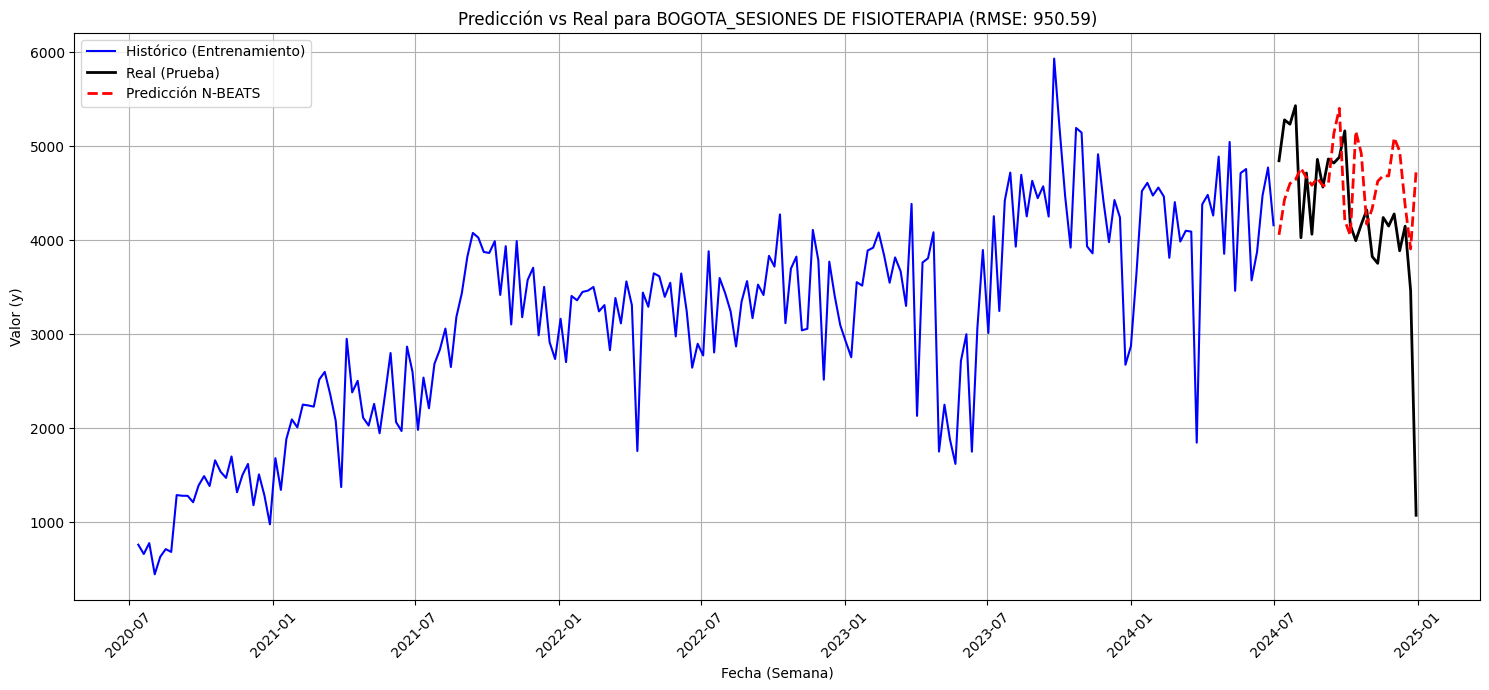

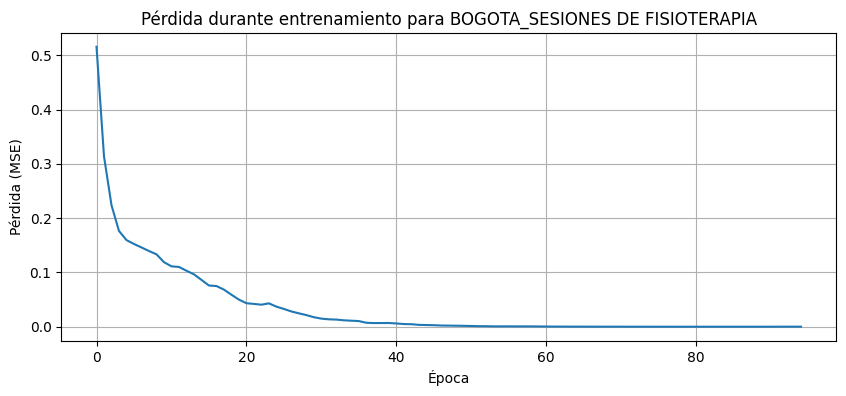


--- Generando predicción futura para BOGOTA_SESIONES DE FISIOTERAPIA ---
Frecuencia inferida: W-MON

Generando pronóstico futuro de 52 semanas...

--- Visualizando Pronóstico Futuro ---


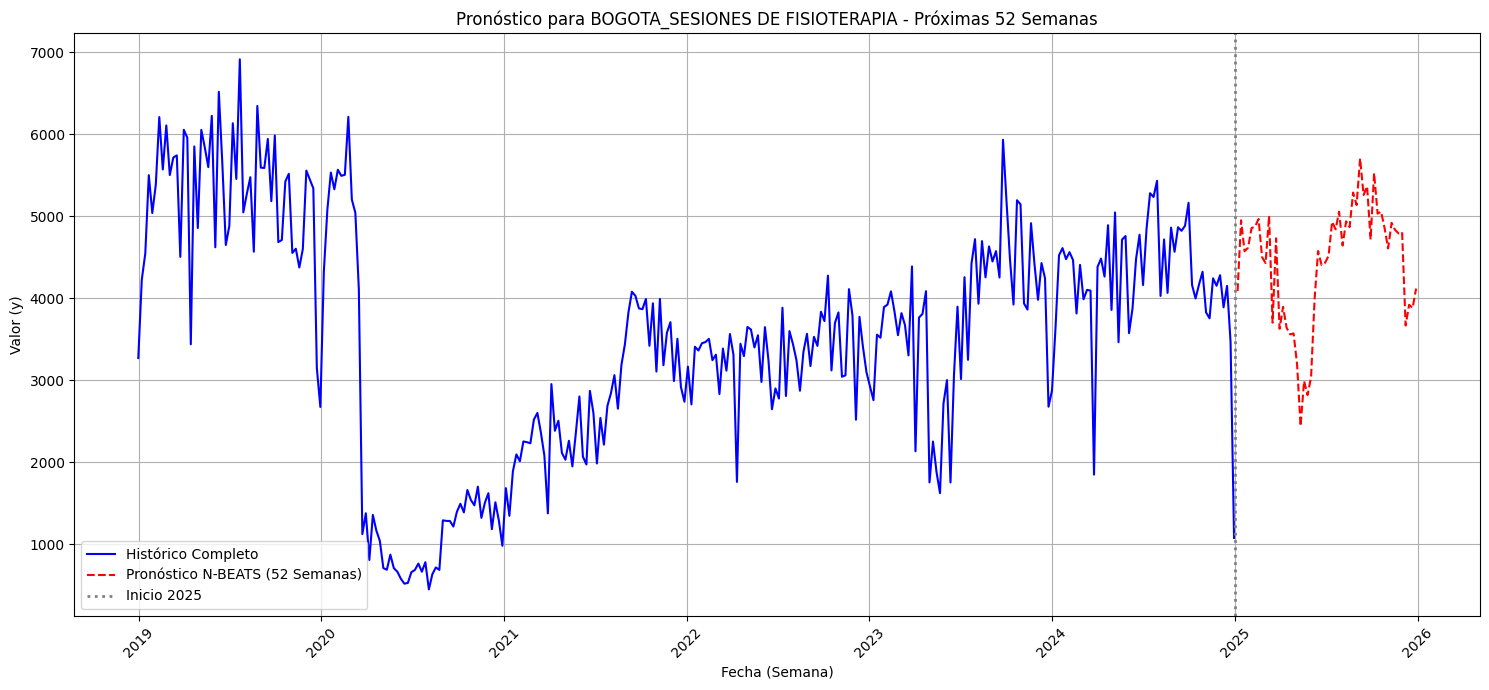

Pronóstico guardado en: pronostico_BOGOTA_SESIONESDEFISIOTERAPIA.csv

Proceso completado.


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gc
import os
import time
from tqdm import tqdm
import numpy as np
import pandas as pd

# Verificar si hay GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

# --- N-BEATS Model Classes (Block, Stack, NBeatsNet) ---
# (Estas clases permanecen sin cambios respecto a la versión anterior)
class Block(nn.Module):
    """
    Bloque N-BEATS básico
    """
    def __init__(self, input_size, theta_size, hidden_layer_size, nb_layers):
        super().__init__()

        self.nb_layers = nb_layers
        self.hidden_layer_size = hidden_layer_size

        # Definición de la red de capas ocultas
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_layer_size)])
        for _ in range(nb_layers - 1):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))

        # Capas de salida para backcast y forecast
        self.theta_backcast = nn.Linear(hidden_layer_size, input_size)
        self.theta_forecast = nn.Linear(hidden_layer_size, theta_size)

    def forward(self, x):
        block_input = x
        for layer in self.layers:
            block_input = torch.relu(layer(block_input))
        backcast = self.theta_backcast(block_input)
        forecast = self.theta_forecast(block_input)
        return backcast, forecast

class Stack(nn.Module):
    """
    Pila de bloques N-BEATS
    """
    def __init__(self, input_size, forecast_length, hidden_layer_size, nb_blocks, nb_layers):
        super().__init__()
        self.forecast_length = forecast_length
        self.blocks = nn.ModuleList([
            Block(
                input_size=input_size,
                theta_size=forecast_length,
                hidden_layer_size=hidden_layer_size,
                nb_layers=nb_layers
            ) for _ in range(nb_blocks)
        ])

    def forward(self, x):
        residuals = x.clone()
        forecast = torch.zeros(x.size(0), self.forecast_length, device=x.device)
        for block in self.blocks:
            backcast, block_forecast = block(residuals)
            residuals = residuals - backcast
            forecast = forecast + block_forecast
        return residuals, forecast # Retorna backcast (residual) y forecast de la pila

class NBeatsNet(nn.Module):
    """
    Red N-BEATS completa con múltiples pilas
    """
    def __init__(self, input_size, forecast_length, hidden_layer_size=128,
                 nb_blocks_per_stack=3, nb_layers=4, nb_stacks=2):
        super().__init__()
        self.input_size = input_size
        self.forecast_length = forecast_length
        self.stacks = nn.ModuleList([
            Stack(
                input_size=input_size,
                forecast_length=forecast_length,
                hidden_layer_size=hidden_layer_size,
                nb_blocks=nb_blocks_per_stack,
                nb_layers=nb_layers
            ) for _ in range(nb_stacks)
        ])

    def forward(self, x):
        total_forecast = torch.zeros(x.size(0), self.forecast_length, device=x.device)
        current_backcast_input = x
        for stack in self.stacks:
            output_backcast, stack_forecast = stack(current_backcast_input)
            current_backcast_input = output_backcast
            total_forecast = total_forecast + stack_forecast
        return total_forecast
# --- End of N-BEATS Model Classes ---


# --- N-BEATS Trainer Class ---
class NBeatsTrainer:
    """
    Entrenador para modelo N-BEATS
    """
    # <<< PARÁMETROS DE ENTRENAMIENTO AJUSTADOS EN __init__ >>>
    def __init__(self, input_size, forecast_length, hidden_layer_size=128,
                 nb_blocks_per_stack=3, nb_layers=4, nb_stacks=2,
                 learning_rate=1e-5,  # <--- TASA DE APRENDIZAJE REDUCIDA
                 batch_size=64):     # <--- TAMAÑO DE LOTE (mantener o ajustar)
        self.input_size = input_size
        self.forecast_length = forecast_length
        self.batch_size = batch_size

        self.model = NBeatsNet(
            input_size=input_size,
            forecast_length=forecast_length,
            hidden_layer_size=hidden_layer_size,
            nb_blocks_per_stack=nb_blocks_per_stack,
            nb_layers=nb_layers,
            nb_stacks=nb_stacks
        ).to(device)

        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()
        self.scaler = StandardScaler()

    def create_sequences(self, data, seq_length, forecast_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length - forecast_length + 1):
            x = data[i:(i + seq_length)]
            y = data[(i + seq_length):(i + seq_length + forecast_length)]
            xs.append(x)
            ys.append(y)
        if not xs: return np.array([]), np.array([])
        return np.array(xs), np.array(ys)

    def prepare_data(self, series):
        series_np = np.array(series).reshape(-1, 1)
        series_scaled = self.scaler.fit_transform(series_np).flatten()
        x, y = self.create_sequences(series_scaled, self.input_size, self.forecast_length)

        if x.size == 0 or y.size == 0:
             print(f"Advertencia: No se pudieron crear secuencias. Datos insuficientes ({len(series)} puntos) para input_size={self.input_size} y forecast_length={self.forecast_length}")
             return None

        x_tensor = torch.FloatTensor(x).to(device)
        y_tensor = torch.FloatTensor(y).to(device)
        dataset = TensorDataset(x_tensor, y_tensor)
        current_batch_size = min(self.batch_size, len(dataset))
        if current_batch_size == 0:
             print(f"Advertencia: Tamaño del dataset es 0 después de crear secuencias.")
             return None
        dataloader = DataLoader(dataset, batch_size=current_batch_size, shuffle=True)
        return dataloader

    # <<< PARÁMETROS DE ENTRENAMIENTO AJUSTADOS EN train >>>
    def train(self, train_series,
              epochs=150,      # <--- MÁS ÉPOCAS
              patience=20):     # <--- MÁS PACIENCIA
        """Entrena el modelo"""
        dataloader = self.prepare_data(train_series)
        if dataloader is None:
            print("Error: No se pudo crear el DataLoader. Entrenamiento abortado.")
            return []

        best_loss = float('inf')
        patience_counter = 0
        train_losses = []
        print(f"Secuencias de entrenamiento: {len(dataloader.dataset)}")

        for epoch in range(epochs):
            self.model.train()
            epoch_losses = []
            with tqdm(dataloader, unit="batch", disable=len(dataloader) <= 1) as tepoch:
                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                for x_batch, y_batch in tepoch:
                    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                    self.optimizer.zero_grad()
                    outputs = self.model(x_batch)

                    if outputs.shape != y_batch.shape:
                        # ... (manejo de error de forma como antes) ...
                        if outputs.numel() == y_batch.numel():
                            try: outputs = outputs.view(y_batch.shape)
                            except RuntimeError as e: continue
                        else: continue

                    loss = self.criterion(outputs, y_batch)
                    loss.backward()
                    self.optimizer.step()
                    epoch_losses.append(loss.item())
                    tepoch.set_postfix(loss=loss.item())

            if device == torch.device('cuda'): torch.cuda.empty_cache()

            if epoch_losses:
                avg_loss = np.mean(epoch_losses)
                train_losses.append(avg_loss)
                print(f"Época {epoch+1}/{epochs}, Pérdida: {avg_loss:.6f}")

                if avg_loss < best_loss:
                    best_loss = avg_loss
                    patience_counter = 0
                    torch.save(self.model.state_dict(), 'best_nbeats_model.pth')
                else:
                    patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping en época {epoch+1}")
                    break
            else:
                print(f"Época {epoch+1}/{epochs} - No se calcularon pérdidas.")

        if os.path.exists('best_nbeats_model.pth'):
            try:
                self.model.load_state_dict(torch.load('best_nbeats_model.pth', map_location=device))
                print("Mejor modelo cargado desde 'best_nbeats_model.pth'.")
            except Exception as e: print(f"Error al cargar el modelo: {e}.")
        else: print("Advertencia: No se encontró 'best_nbeats_model.pth'.")

        gc.collect()
        return train_losses

    def predict(self, history, forecast_steps):
        """Genera predicciones (asegurándose que no sean negativas)"""
        self.model.eval()
        history_np = np.array(history).reshape(-1, 1)
        try:
            if not hasattr(self.scaler, 'mean_') or self.scaler.mean_ is None:
                print("Error: El scaler no ha sido ajustado.")
                return np.array([])
            history_scaled = self.scaler.transform(history_np).flatten()
        except Exception as e:
            print(f"Error durante la normalización en predict: {e}")
            return np.array([])

        if len(history_scaled) < self.input_size:
             print(f"Advertencia en predict: Historial escalado ({len(history_scaled)}) < input_size ({self.input_size}). Rellenando.")
             pad_width = self.input_size - len(history_scaled)
             current_input_scaled = np.pad(history_scaled, (pad_width, 0), 'constant', constant_values=0)
        else:
             current_input_scaled = history_scaled[-self.input_size:]

        x_tensor = torch.FloatTensor(current_input_scaled).unsqueeze(0).to(device)
        all_forecasts_scaled = []

        with torch.no_grad():
            num_prediction_loops = int(np.ceil(forecast_steps / self.forecast_length))
            for i in range(num_prediction_loops):
                step_forecast_scaled = self.model(x_tensor)
                step_forecast_np = step_forecast_scaled.squeeze().cpu().numpy()
                if np.isscalar(step_forecast_np): step_forecast_np = np.array([step_forecast_np])
                all_forecasts_scaled.extend(step_forecast_np)
                if i == num_prediction_loops - 1: break
                current_input_np = x_tensor.squeeze().cpu().numpy()
                next_input_np = np.append(current_input_np[self.forecast_length:], step_forecast_np)
                if len(next_input_np) != self.input_size:
                     print(f"Advertencia: Ajustando longitud de next_input_np.")
                     next_input_np = next_input_np[-self.input_size:]
                x_tensor = torch.FloatTensor(next_input_np).unsqueeze(0).to(device)

        final_forecast_scaled = np.array(all_forecasts_scaled[:forecast_steps])
        try:
            forecast = self.scaler.inverse_transform(final_forecast_scaled.reshape(-1, 1)).flatten()
        except Exception as e:
            print(f"Error durante la desnormalización en predict: {e}")
            forecast = final_forecast_scaled

        forecast = np.nan_to_num(forecast)
        forecast[forecast < 0] = 0 # Asegurar no negativos
        return forecast
# --- End of N-BEATS Trainer Class ---


# --- Training and Evaluation Function ---
# <<< PARÁMETROS DE ENTRENAMIENTO AJUSTADOS EN LA LLAMADA A NBeatsTrainer y trainer.train >>>
def train_and_evaluate_nbeats(serie_semanal_df, id_serie,
                              # Parámetros de ventana (se pueden ajustar también)
                              input_window=52, forecast_window=12, test_size=26,
                              # Parámetros de arquitectura (se pueden ajustar también)
                              hidden_size=256, blocks=3, layers=4, stacks=2,
                              # Parámetros de entrenamiento (ahora con nuevos defaults)
                              lr=1e-5, batch=64, num_epochs=150, early_patience=20):
    """
    Entrena y evalúa un modelo N-BEATS para un ID_Serie específico con hiperparámetros ajustables.
    """
    # --- Data Preparation ---
    data = serie_semanal_df[serie_semanal_df['ID_Serie'] == id_serie].copy()
    try: data['ds'] = pd.to_datetime(data['ds'])
    except Exception as e: return None, None, None, None
    data = data.sort_values('ds').reset_index(drop=True)
    min_data_points = input_window + test_size
    if len(data) < min_data_points: return None, None, None, None
    try: y_values = data['y'].astype(float).values
    except ValueError: return None, None, None, None
    if np.all(y_values == y_values[0]): print(f"ADVERTENCIA: Valores constantes en {id_serie}.")

    train_data = y_values[:-test_size]
    test_data = y_values[-test_size:]
    dates_test = data['ds'].values[-test_size:]
    dates_train = data['ds'].values[:-test_size]

    # --- Model Training ---
    # Crear y entrenar el modelo con los parámetros pasados
    trainer = NBeatsTrainer(
        input_size=input_window,
        forecast_length=forecast_window,
        hidden_layer_size=hidden_size,
        nb_blocks_per_stack=blocks,
        nb_layers=layers,
        nb_stacks=stacks,
        learning_rate=lr,      # <--- Usa el learning rate pasado
        batch_size=batch       # <--- Usa el batch size pasado
    )

    print(f"\nEntrenando modelo N-BEATS para {id_serie}...")
    print(f"Params: lr={lr}, epochs={num_epochs}, patience={early_patience}, batch={batch}")
    print(f"Arch: hidden={hidden_size}, blocks={blocks}, layers={layers}, stacks={stacks}")
    print(f"Window: input={input_window}, forecast_block={forecast_window}, test={test_size}")
    print(f"Datos entrenamiento: {len(train_data)}, Prueba: {len(test_data)}")

    # Entrenar usando los parámetros de épocas y paciencia pasados
    train_losses = trainer.train(train_data, epochs=num_epochs, patience=early_patience)

    # --- Prediction and Evaluation ---
    if len(train_data) < input_window:
         print(f"Advertencia: Datos de entrenamiento insuficientes para predecir.")
         return trainer, None, test_data, None

    predictions = trainer.predict(train_data, forecast_steps=test_size)

    if len(predictions) != len(test_data):
        print(f"Advertencia: Longitud de predicción no coincide con test_data. Ajustando.")
        min_len = min(len(predictions), len(test_data))
        predictions = predictions[:min_len]
        test_data = test_data[:min_len]
        dates_test = dates_test[:min_len]

    if len(predictions) == 0:
         print("Error: No se generaron predicciones válidas.")
         return trainer, None, test_data, None

    # Calcular métricas
    mse = np.mean((predictions - test_data) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(predictions - test_data))
    print(f"\nResultados para {id_serie}: MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}")

    # --- Visualization ---
    plt.figure(figsize=(15, 7))
    plot_train_start_idx = max(0, len(dates_train) - 2 * input_window)
    plt.plot(dates_train[plot_train_start_idx:], train_data[plot_train_start_idx:], 'b-', label='Histórico (Entrenamiento)')
    plt.plot(dates_test, test_data, 'k-', linewidth=2, label='Real (Prueba)')
    plt.plot(dates_test, predictions, 'r--', linewidth=2, label='Predicción N-BEATS')
    plt.title(f'Predicción vs Real para {id_serie} (RMSE: {rmse:.2f})')
    plt.xlabel('Fecha (Semana)'); plt.ylabel('Valor (y)')
    plt.legend(); plt.grid(True); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

    if train_losses:
        plt.figure(figsize=(10, 4))
        plt.plot(train_losses)
        plt.title(f'Pérdida durante entrenamiento para {id_serie}')
        plt.xlabel('Época'); plt.ylabel('Pérdida (MSE)')
        plt.grid(True); plt.show()

    # Liberar memoria
    preds_to_return = predictions.copy()
    actuals_to_return = test_data.copy()
    del data, train_data, test_data, y_values, predictions
    gc.collect()
    if device == torch.device('cuda'): torch.cuda.empty_cache()

    return trainer, preds_to_return, actuals_to_return, rmse
# --- End of Training and Evaluation Function ---


# --- Future Forecasting Function ---
# (Esta función permanece sin cambios respecto a la versión anterior)
def multi_step_forecast(trainer, history_values, history_dates, periods_to_forecast=52, freq='W-MON'):
    """Genera una predicción multi-paso para varios períodos en el futuro."""
    if trainer is None: return None
    if len(history_values) < trainer.input_size: return None
    print(f"\nGenerando pronóstico futuro de {periods_to_forecast} semanas...")
    forecast_values = trainer.predict(history_values, forecast_steps=periods_to_forecast)
    if len(forecast_values) == 0: return None
    try:
        last_date = pd.to_datetime(history_dates).max()
        future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=periods_to_forecast, freq=freq)
    except Exception as e: return None
    if len(forecast_values) != len(future_dates):
        min_len = min(len(forecast_values), len(future_dates))
        forecast_values = forecast_values[:min_len]
        future_dates = future_dates[:min_len]
    forecast_df = pd.DataFrame({'ds': future_dates,'forecast': forecast_values})
    return forecast_df
# --- End of Future Forecasting Function ---


try:
    if 'serie_semanal' not in locals():
         print(f"Intentando cargar '{CSV_FILENAME}'...")
         serie_semanal = pd.read_csv(CSV_FILENAME)
         print("DataFrame 'serie_semanal' cargado.")

    required_cols = ['y', 'ds', 'ID_Serie']
    missing_cols = [col for col in required_cols if col not in serie_semanal.columns]
    if missing_cols: raise ValueError(f"Error: Faltan columnas: {missing_cols}")

    if not pd.api.types.is_numeric_dtype(serie_semanal['y']):
        print("Convirtiendo 'y' a numérico...")
        serie_semanal['y'] = pd.to_numeric(serie_semanal['y'], errors='coerce')
        nan_count = serie_semanal['y'].isna().sum()
        if nan_count > 0:
            print(f"Rellenando {nan_count} NaNs en 'y' con 0.")
            serie_semanal['y'] = serie_semanal['y'].fillna(0)

except FileNotFoundError: print(f"Error: Archivo '{CSV_FILENAME}' no encontrado."); exit()
except ValueError as ve: print(ve); exit()
except Exception as e: print(f"Error inesperado: {e}"); exit()


# --- Entrenamiento para una serie específica ---
id_series_unicas = serie_semanal['ID_Serie'].unique()

if len(id_series_unicas) == 0:
    print("No se encontraron ID_Serie únicas.")
else:
    indice_elegido = 2406 # Elige qué serie procesar (0 es la primera)
    if indice_elegido < len(id_series_unicas):
        id_serie_elegida = id_series_unicas[indice_elegido]
        print(f"\n========================================================")
        print(f"Procesando ID_Serie: {id_serie_elegida} (Índice: {indice_elegido})")
        print(f"========================================================")

        # --- AJUSTA AQUÍ LOS PARÁMETROS SI DESEAS EXPERIMENTAR ---
        # Parámetros de Ventana
        INPUT_WEEKS = 94
        FORECAST_BLOCK = 12 # Tamaño interno de predicción NBEATS
        TEST_WEEKS = 26

        # Parámetros de Arquitectura
        HIDDEN_SIZE = 1024   # Neuronas por capa oculta
        N_BLOCKS = 18        # Bloques por pila
        N_LAYERS = 8        # Capas por bloque
        N_STACKS = 4        # Número de pilas

        # Parámetros de Entrenamiento (Ya ajustados en NBeatsTrainer y train_and_evaluate_nbeats)
        LEARNING_RATE = 3e-4  # Tasa de aprendizaje más baja
        BATCH_SIZE = 32
        NUM_EPOCHS = 50    # Más épocas
        PATIENCE = 10       # Más paciencia

        # Entrenar y evaluar modelo
        trainer, preds, actuals, rmse = train_and_evaluate_nbeats(
            serie_semanal_df=serie_semanal,
            id_serie=id_serie_elegida,
            # Pasa los parámetros definidos arriba
            input_window=INPUT_WEEKS,
            forecast_window=FORECAST_BLOCK,
            test_size=TEST_WEEKS,
            hidden_size=HIDDEN_SIZE,
            blocks=N_BLOCKS,
            layers=N_LAYERS,
            stacks=N_STACKS,
            lr=LEARNING_RATE,
            batch=BATCH_SIZE,
            num_epochs=NUM_EPOCHS,
            early_patience=PATIENCE
        )

        # --- Predicción Futura ---
        if trainer is not None and preds is not None:
            print(f"\n--- Generando predicción futura para {id_serie_elegida} ---")
            data_serie = serie_semanal[serie_semanal['ID_Serie'] == id_serie_elegida].copy()
            try:
                data_serie['ds'] = pd.to_datetime(data_serie['ds'])
                data_serie = data_serie.sort_values('ds').reset_index(drop=True)
            except Exception as e: forecast_df = None
            else:
                history_values = data_serie['y'].astype(float).values
                history_dates = data_serie['ds'].values
                WEEKS_TO_FORECAST = 52 # Semanas a predecir

                data_freq = pd.infer_freq(data_serie['ds'])
                if data_freq is None:
                    # ... (lógica de inferencia de frecuencia como antes) ...
                    data_freq = 'W-MON' # Default si falla la inferencia
                    print(f"Usando frecuencia default: {data_freq}")
                else: print(f"Frecuencia inferida: {data_freq}")

                forecast_df = multi_step_forecast(trainer, history_values, history_dates,
                                                  periods_to_forecast=WEEKS_TO_FORECAST, freq=data_freq)

            if forecast_df is not None:
                print("\n--- Visualizando Pronóstico Futuro ---")
                plt.figure(figsize=(15, 7))
                plt.plot(data_serie['ds'], data_serie['y'], 'b-', label='Histórico Completo')
                plt.plot(forecast_df['ds'], forecast_df['forecast'], 'r--', label=f'Pronóstico N-BEATS ({WEEKS_TO_FORECAST} Semanas)')
                start_2025 = pd.Timestamp('2025-01-01')
                plot_start_date = data_serie['ds'].min() if not data_serie.empty else pd.Timestamp.now()
                plot_end_date = forecast_df['ds'].max() if not forecast_df.empty else pd.Timestamp.now()
                if plot_start_date <= start_2025 <= plot_end_date:
                     plt.axvline(start_2025, color='grey', linestyle=':', linewidth=2, label='Inicio 2025')
                plt.title(f'Pronóstico para {id_serie_elegida} - Próximas {WEEKS_TO_FORECAST} Semanas')
                plt.xlabel('Fecha (Semana)'); plt.ylabel('Valor (y)')
                plt.legend(); plt.grid(True); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

                try:
                    safe_id = "".join([c for c in id_serie_elegida if c.isalnum() or c in ('_')]).rstrip()
                    forecast_filename = f'pronostico_{safe_id}.csv'
                    forecast_df.to_csv(forecast_filename, index=False)
                    print(f"Pronóstico guardado en: {forecast_filename}")
                except Exception as e: print(f"Error al guardar el pronóstico: {e}")
        else:
            print(f"\nNo se pudo entrenar/predecir para {id_serie_elegida}.")
    else:
        print(f"Índice ({indice_elegido}) fuera de rango para {len(id_series_unicas)} series.")

print("\nProceso completado.")